# Filtragem

A Usando o MATLAB (ou equivalente), especifique e projete um filtro rejeita-faixa FIR
utilizando a função remez ou firpm, ou equivalente, para filtrar de uma amostra de
áudio $x(t)$, em formato wav, um sinal de ruído propositadamente adicionado ao sinal
de áudio, e representado por $n(t) = cos(2πf1t) + cos(2πf2t)$, em que $fn$ (Hz) representa
os valores de frequência do ruído. Utilize as funções **audioread**, ou equivalente, para
ler o arquivo de áudio para um vetor de manipulação e **audiowrite**, ou equivalente,
para escrever o arquivo de áudio a partir de um vetor de manipulação. Além disso,
utilize a função *filter*, ou equivalente, para filtrar o ruído do sinal de áudio contaminado,
utilizando a resposta ao impulso projetada anteriormente. Mostre os gráficos do sinal
de áudio $x[n]$, do sinal corrompido pelo ruído $z[n] = x[n] + n[n]$, e do sinal filtrado $y[n]$,
em ambos os domínios discretos: tempo e frequência (utilize as funções *fft* e *fftshift*,
ou equivalentes, para obter os sinais no domínio da frequência). Também apresente
a resposta ao impulso e a resposta em frequência (definida em termos da resposta
em magnitude e resposta de fase, obtidas por sua vez, por meio da função *freqz*, ou
equivalente) do filtro projetado.

<br>

Obs1.: Cada grupo deve escolher um dos parâmetros abaixo para especificar 
as frequências do ruído $f1$, $f2$.

Obs2.: A amostra do sinal de áudio é de livre escolha.

![Parametros](./parametros.jpg)

In [30]:
# Bibliotecas que foramutilizadas para realizar a atividade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
import scipy.io
from scipy import signal

import IPython

import os

PATH_IMG = "./imgs/"

print(os.getcwd())
print(os.listdir())

def cm_to_inch(value):
    return value/2.54

/home/andre/Documents/Git/STD_DCA0107/U1
['.ipynb_checkpoints', 'filtragem.ipynb', 'Projeto_Filtragem_remez.pdf', 'audio_ruidoso.wav', 'filtragem.pdf', 'imgs', 'parametros.jpg', 'exemplo.wav', 'audio_filtrado_remez.wav', 'audio_filtrado.wav']


In [31]:
def plot_fft(title, data, fs, xlim):
    Nfft = len(data)

    freqs = np.linspace(0, fs/2, int(Nfft/2+1))

    figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

    plt.title('FFT do Audio')
    plt.plot(freqs, abs(data[0:len(freqs)]))

    plt.xlabel("Frequências [Hz]")
    plt.ylabel("Amplitudes")
    plt.grid()
    plt.xlim(xlim)

    plt.savefig(PATH_IMG+f'{title}.png')

    plt.show()

# Espectograma e FFT do áudio

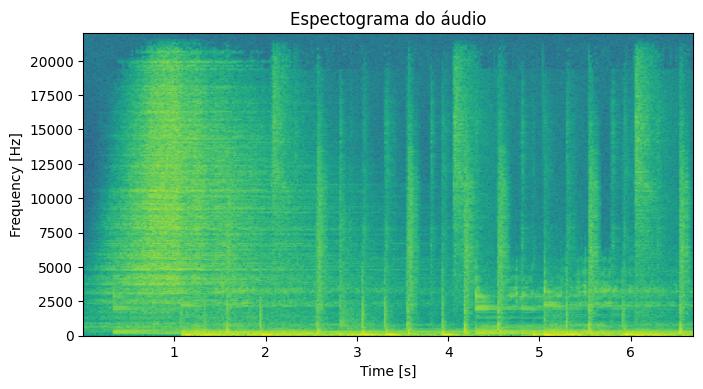

In [32]:
fs, data = scipy.io.wavfile.read("exemplo.wav")

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

spec, freqs, t, _ = plt.specgram(data, NFFT=1024, Fs=fs)

plt.title("Espectograma do áudio")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.savefig(PATH_IMG+"espectograma_audio.png")

plt.show()

scipy.io.wavfile.write('exemplo.wav', fs, data.astype(np.int16))
IPython.display.Audio("exemplo.wav")

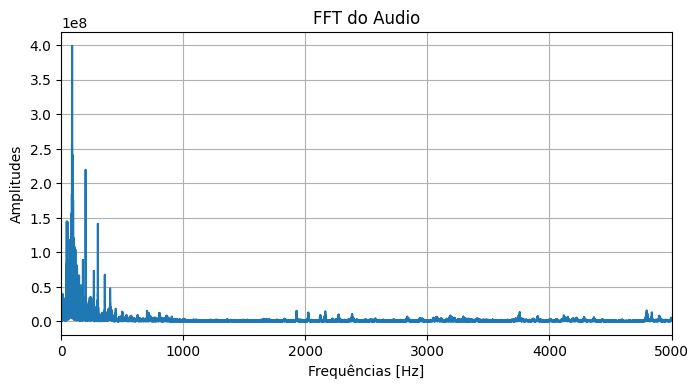

In [33]:
data_fft = fft(data)

plot_fft("FFT do audio", data_fft, fs, [0, 5000])

# Adição do Ruído

$n(t) = \cos{(2\pi f_1 t)} + \cos{(2\pi f_2 t)}$

![Parametros](./parametros.jpg)

<Figure size 787.402x393.701 with 0 Axes>

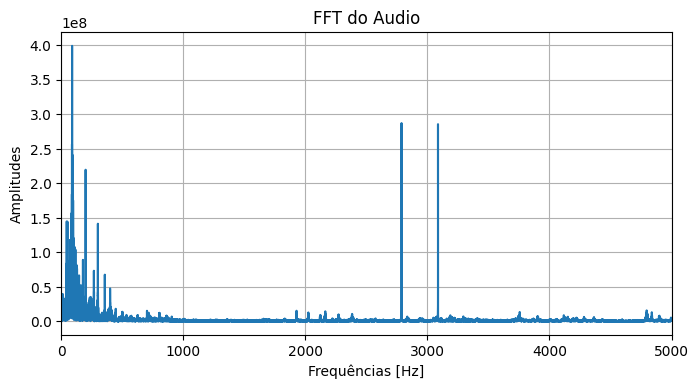

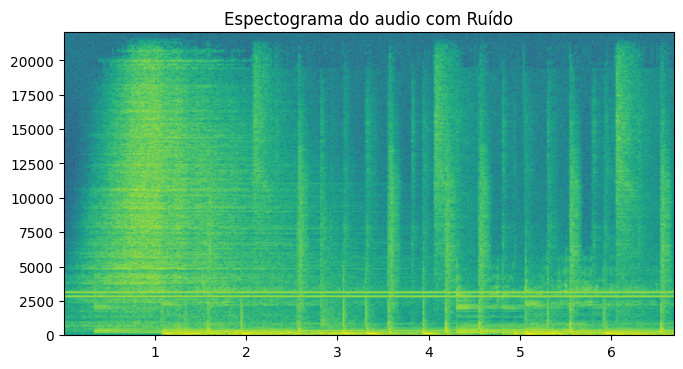

In [34]:
f1 = 2.8e3
f2 = 3.1e3

# Valor arbitrario para aumentar ou diminuir o ruído
Amplitude = 2e3

time = np.linspace(0, t[len(t)-1], len(data))
n_t = Amplitude*np.cos(2 * np.pi * f1 * time) + Amplitude*np.cos(2 * np.pi * f2 * time)

data_ruido = data + n_t

data_ruido_fft = fft(data_ruido)

Nfft = len(data_ruido_fft)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plot_fft("FFT do Áudio com Ruído", data_ruido_fft, fs, [0, 5000])

scipy.io.wavfile.write('audio_ruidoso.wav', fs, data_ruido.astype(np.int16))
IPython.display.Audio("audio_ruidoso.wav")

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.title("Espectograma do audio com Ruído")
Pxx, freqs, bins, im = plt.specgram(data_ruido, NFFT=1024, Fs=fs)
plt.savefig(PATH_IMG+"espectograma_audio_corrompido.png")

scipy.io.wavfile.write('audio_ruidoso.wav', fs, data_ruido.astype(np.int16))
IPython.display.Audio("audio_ruidoso.wav")

# Realizando a Filtragem

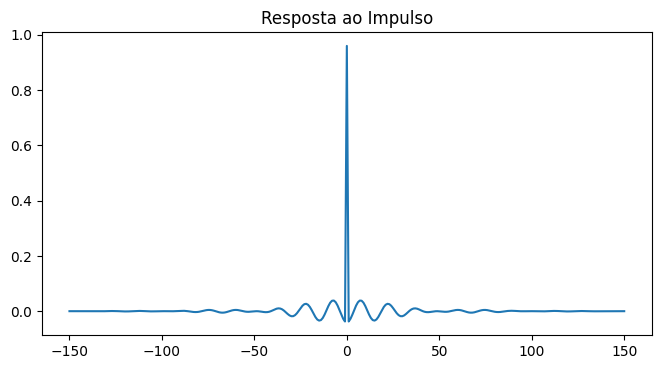

In [35]:
np.seterr(divide='ignore', invalid='ignore')

# Numero de Taps do filtro
M = 150

n1 = np.arange(-M,(M+1),1)
NSamples = len(n1)

offset = 300

# Frequencias de corte do filtro rejeita faixa
wc1 = (f1 - offset)*np.pi/(fs/2)
wc2 = (f2 + offset)*np.pi/(fs/2)

# Equacao caracteristica de um filtro rejeita faixa com janela Retangular
hrf = 1/(np.pi*n1) * (np.sin(wc1*n1) - np.sin(wc2*n1)) 
hrf[n1 == 0] = 1 - (wc2 - wc1) / np.pi

# Funcao auxiliar que ira ser multiplicada pelo filtro
w2 = signal.windows.hamming(len(n1))

hrf = hrf*w2

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(n1,hrf)
plt.title('Resposta ao Impulso')

plt.savefig(PATH_IMG+"resposta_ao_impulso_filtro.png")

plt.show()


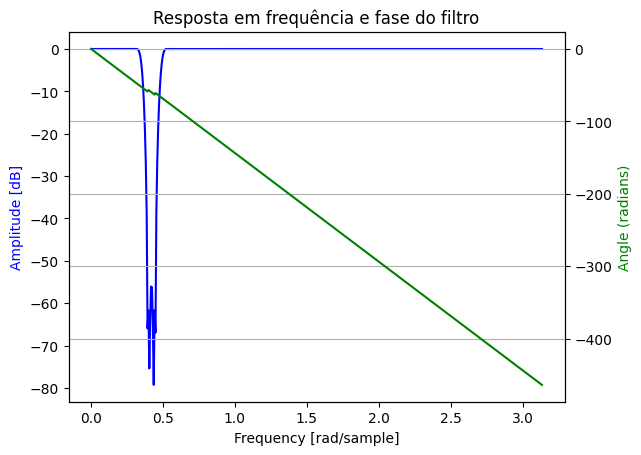

In [36]:
w, h = signal.freqz(hrf)
angles = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax1.set_title('Resposta em frequência e fase do filtro')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')

plt.savefig(PATH_IMG+"freqz_do_filtro.png")

plt.show()

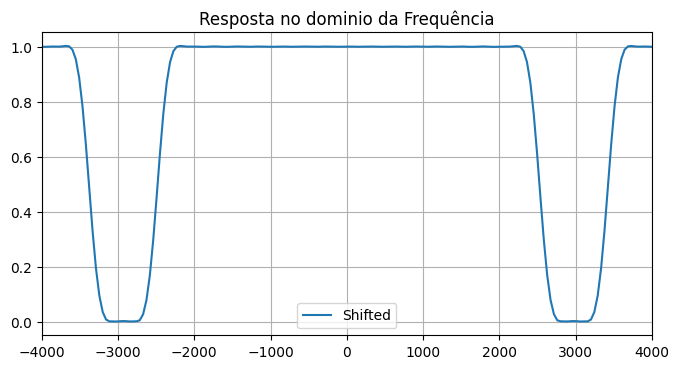

In [37]:
# Variavel para somente plotar o grafico da resposta 
# no dom. da frequencia
Hw = fft(hrf,1000)

freq_plot = np.linspace(-fs/2, fs/2, len(Hw))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(freq_plot, abs(fftshift(Hw)), label="Shifted")
plt.grid()
plt.legend()
plt.xlim(-4000, 4000)

plt.title("Resposta no dominio da Frequência")
plt.savefig(PATH_IMG+"resposta_ao_impulso_frequencia.png")

plt.show()


<Figure size 787.402x393.701 with 0 Axes>

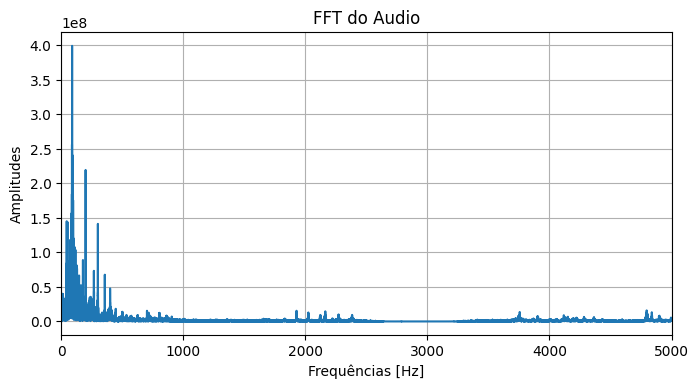

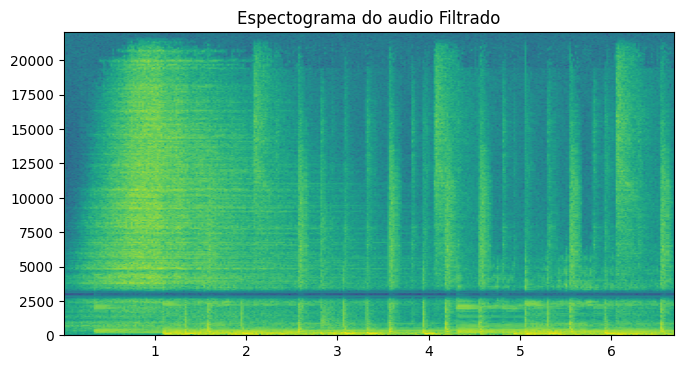

In [38]:
data_filtrado = signal.lfilter(hrf, 1, data_ruido)

data_filtrado_fft = fft(data_filtrado)

Nfft = len(data_filtrado)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plot_fft("FFT do Áudio Filtrado", data_filtrado_fft, fs, [0, 5000])

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.title("Espectograma do audio Filtrado")
Pxx, freqs, bins, im = plt.specgram(data_filtrado, NFFT=1024, Fs=fs)
plt.savefig(PATH_IMG+"espectograma_audio_filtrado.png")

scipy.io.wavfile.write('audio_filtrado.wav', fs, data_filtrado.astype(np.int16))
IPython.display.Audio("audio_filtrado.wav")

# Usando a função REMEZ

O trecho que código foi retirado do próprio exemplo
do [scipy](https://docs.scipy.org/doc/scipy-1.14.1/reference/generated/scipy.signal.remez.html)
e adaptado para realizar a atividade.

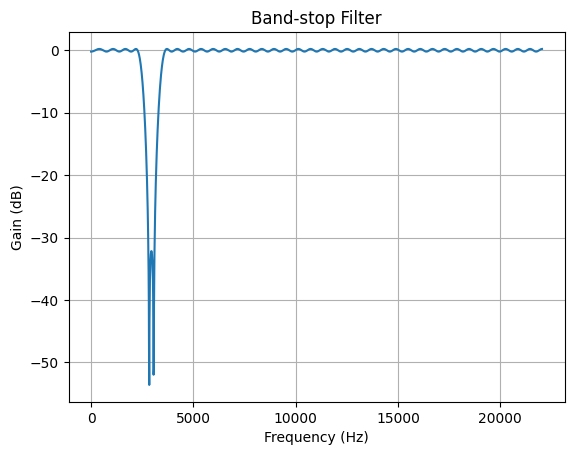

In [39]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w, 20*np.log10(np.abs(h)))
    # ax.set_ylim(-40, 5)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

band = [f1, f2]  # Desired stop band, Hz
trans_width = 500    # Width of transition from pass to stop, Hz
numtaps = 149     # Size of the FIR filter.

edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*fs]

taps = signal.remez(numtaps, edges, [1, 0, 1], fs=fs)

w, h = signal.freqz(taps, [1], worN=2000, fs=fs)

plot_response(w, h, "Band-stop Filter")
plt.show()

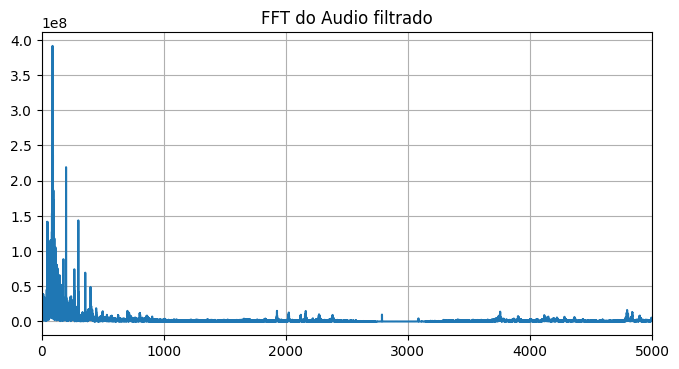

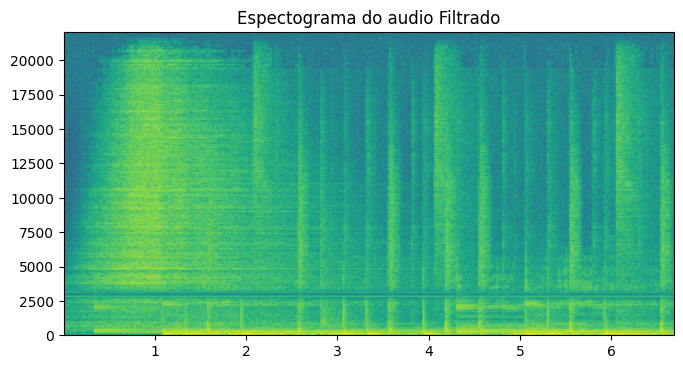

In [40]:
data_filtrado = signal.lfilter(taps, 1, data_ruido)
# data_filtrado = signal.lfilter(h2, 1, data_filtrado)

data_filtrado_fft = fft(data_filtrado)

Nfft = len(data_filtrado)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.title('FFT do Audio filtrado')
plt.plot(freqs, abs(data_filtrado_fft[0:len(freqs)]))
plt.grid()
plt.xlim(0, 5000)

plt.savefig(PATH_IMG+"fft_audio_filtrado.png")

plt.show()


figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.title("Espectograma do audio Filtrado")
Pxx, freqs, bins, im = plt.specgram(data_filtrado, NFFT=1024, Fs=fs)
plt.savefig(PATH_IMG+"espectograma_audio_filtrado.png")

scipy.io.wavfile.write('audio_filtrado_remez.wav', fs, data_filtrado.astype(np.int16))
IPython.display.Audio("audio_filtrado_remez.wav")